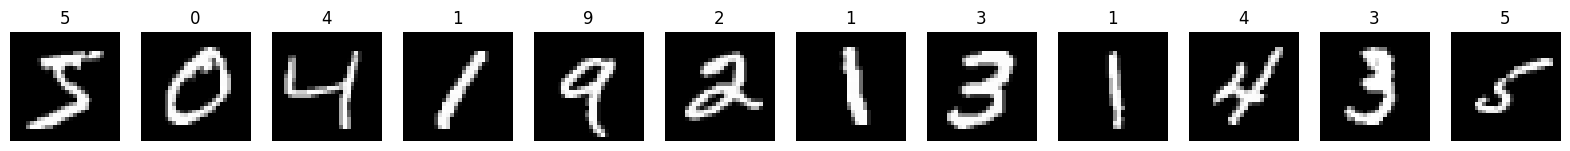

X_train original shape: (60000, 28, 28)
y_train original shape: (60000,)
Epoch 1/20


c:\Users\abid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7253 - loss: 0.8639 - val_accuracy: 0.9463 - val_loss: 0.1844
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9324 - loss: 0.2336 - val_accuracy: 0.9589 - val_loss: 0.1338
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9497 - loss: 0.1685 - val_accuracy: 0.9662 - val_loss: 0.1107
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9592 - loss: 0.1320 - val_accuracy: 0.9707 - val_loss: 0.0995
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9655 - loss: 0.1107 - val_accuracy: 0.9746 - val_loss: 0.0915
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9712 - loss: 0.0973 - val_accuracy: 0.9739 - val_loss: 0.0935
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9738 - loss: 0.0858 - val_accuracy: 0.9755 - val_loss: 0.0897
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9761 - loss: 0.0781 - val_accuracy: 0.9752 - val_

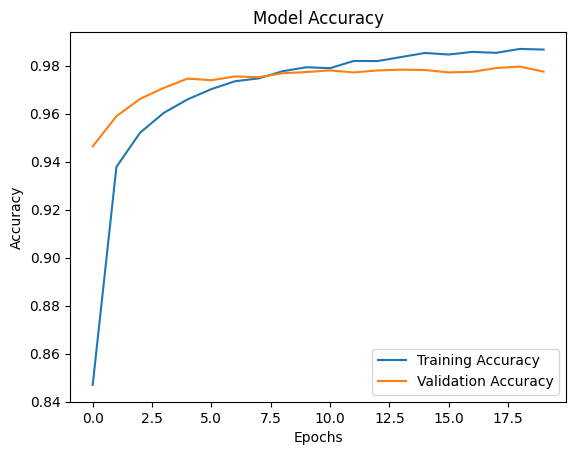

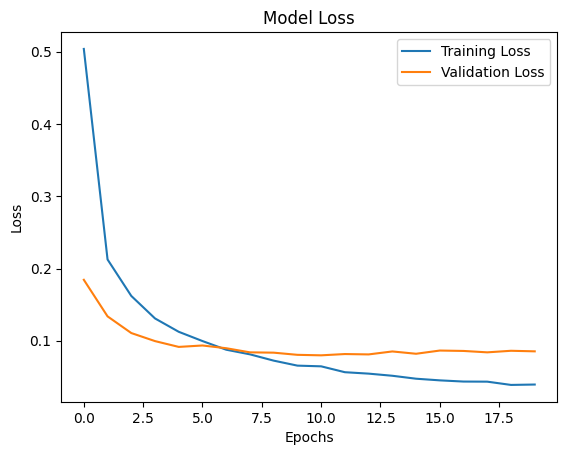

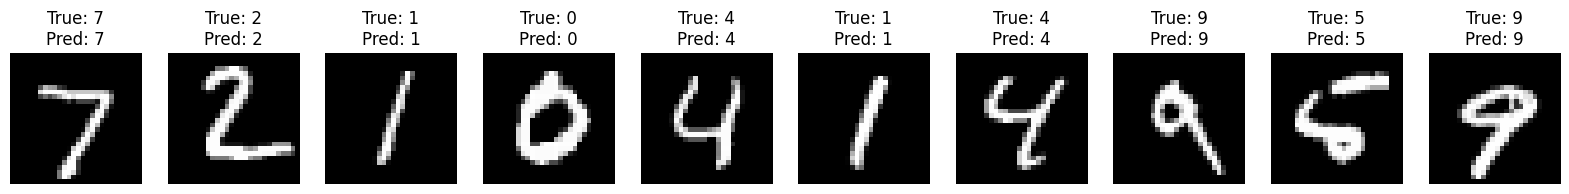

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist

# Memuat Dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Menampilkan 12 gambar pertama dalam dataset
fig, axes = plt.subplots(1, 12, figsize=(20, 2))
for i in range(12):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(y_train[i])
    axes[i].axis('off')
plt.show()

# Output
print(f"X_train original shape: {x_train.shape}")
print(f"y_train original shape: {y_train.shape}")

# Normalisasi data
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding pada label
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Membuat model ANN
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Meratakan input gambar 28x28
model.add(Dense(128, activation='relu'))  # Hidden layer dengan 128 neuron dan aktivasi ReLU
model.add(Dropout(0.2))                   # Dropout untuk mengurangi overfitting
model.add(Dense(64, activation='relu'))   # Hidden layer dengan 64 neuron dan aktivasi ReLU
model.add(Dropout(0.2))                   # Dropout untuk mengurangi overfitting
model.add(Dense(10, activation='softmax'))  # Output layer dengan 10 neuron (untuk 10 kelas) dan aktivasi softmax

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2, batch_size=128)

# Evaluasi model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Menghitung Precision
from sklearn.metrics import precision_score

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

precision = precision_score(y_true, y_pred_classes, average='macro')
print(f"Test Precision: {precision:.2f}")

# Visualisasi Akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Visualisasi Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualisasi beberapa prediksi
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    axes[i].imshow(x_test[i], cmap='gray')
    axes[i].set_title(f"True: {y_true[i]}\nPred: {y_pred_classes[i]}")
    axes[i].axis('off')
plt.show()
